## Task 1: Empirical vs. Theoretical PMF for Dice Sums

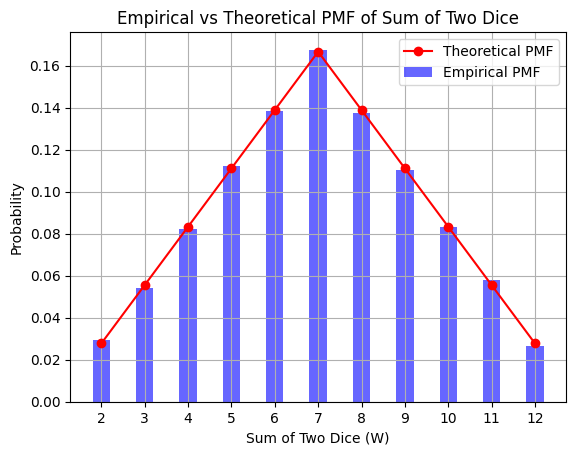

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Set seeds for reproducibility
np.random.seed(2025)

#(a) Simulate N =10,000 independent trials of rolling two fair dice; form W = X + Y .
N = 10000
X = np.random.randint(1, 7, N)  # First die
Y = np.random.randint(1, 7, N)  # Second die
W = X + Y  # Sum of the two dice

#(b) Compute the empirical PMF of W on {2, . . . , 12}.
values, counts = np.unique(W, return_counts=True) # Unique sums and their counts
pmf_W = counts / N # Empirical PMF = counts divided by total trials


#(c) Compute the theoretical PMF by enumerating all 36 outcomes.
# Each sum (2 to 12) can be obtained in different ways out of 36 total combinations:
# 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:5, 9:4, 10:3, 11:2, 12:1
theoretical_values = np.arange(2, 13) # Possible sums from 2 to 12
theoretical_pmf = np.array([1,2,3,4,5,6,5,4,3,2,1]) / 36 # Theoretical PMF = counts / 36

#Bar plot of the empirical PMF with the theoretical PMF overlaid (markers/line).
plt.bar(values, pmf_W, width=0.4, alpha=0.6, label='Empirical PMF', color='b', align='center')
plt.plot(theoretical_values, theoretical_pmf, 'ro-', label='Theoretical PMF') # Red line with markers
plt.xlabel('Sum of Two Dice (W)')
plt.ylabel('Probability')
plt.title('Empirical vs Theoretical PMF of Sum of Two Dice')
plt.xticks(theoretical_values)
plt.legend()
plt.grid()
plt.show()


## Task 2: Sum of Exponentials ⇒ Gamma

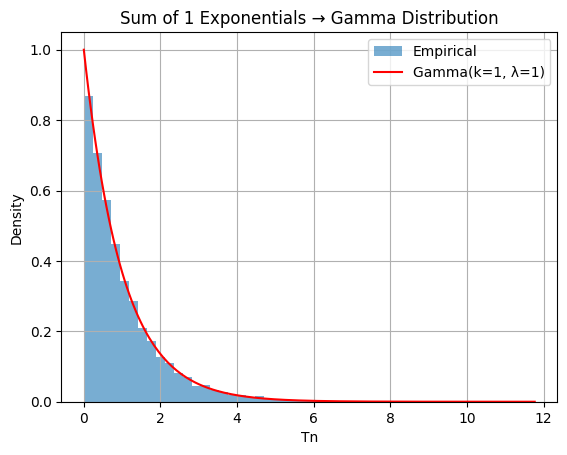

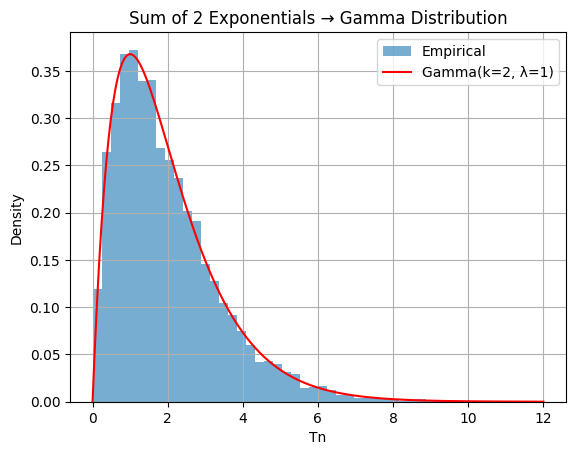

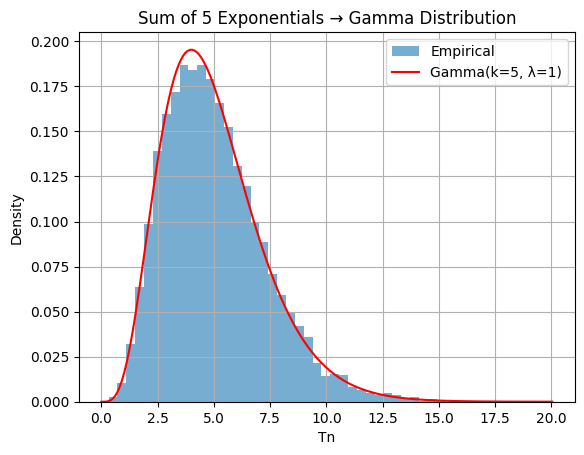

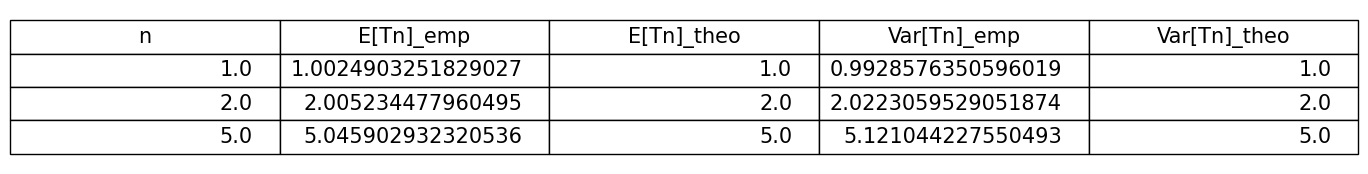

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon, gamma

# Set seeds for reproducibility
np.random.seed(2025)

#(a) samples generation
# Initialize parameters
M = 10000
lam = 1
n_values = [1, 2, 5]
samples = {}

for n in n_values:
    # Generate M samples of Tn = S1 + S2 + ... + Sn
    Yi = np.random.exponential(1/lam, size=(M, n)) # M samples of n exponentials
    Tn = Yi.sum(axis=1) # Sum along rows to get Tn samples
    samples[n] = Tn
    
#(b) For each n, plot a normalized histogram and overlay Gamma(k=n, rate λ)
for n in n_values:
    plt.figure()
    plt.hist(samples[n], bins=50, density=True, alpha=0.6, label='Empirical')
    
    x = np.linspace(0, np.max(samples[n]), 200)
    plt.plot(x, gamma.pdf(x, a=n, scale=1/lam), 'r-', label=f'Gamma(k={n}, λ={lam})')
    
    plt.title(f'Sum of {n} Exponentials → Gamma Distribution')
    plt.xlabel('Tn')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    
#(d) For each n, report empirical mean/variance of Tn and the theoretical values E[Tn ] = n/λ, Var(Tn ) = n/λ2
rows = []
for n in n_values:
    mean_emp = np.mean(samples[n]) # Empirical mean
    var_emp = np.var(samples[n]) # Empirical variance
    mean_theo = n / lam # Theoretical mean
    var_theo = n / (lam**2) # Theoretical variance
    rows.append([n, mean_emp, mean_theo, var_emp, var_theo])

df = pd.DataFrame(rows, columns=['n', 'E[Tn]_emp', 'E[Tn]_theo', 'Var[Tn]_emp', 'Var[Tn]_theo'])


# Plot table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # remove axis

# Convert DataFrame to matplotlib table
table = ax.table(
    cellText=df.values,       # table values
    colLabels=df.columns,     # column headers
    loc='center'
)

# Style
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(2.9, 2)

plt.show()


## Task 3: CLT Demonstration with Sample Means

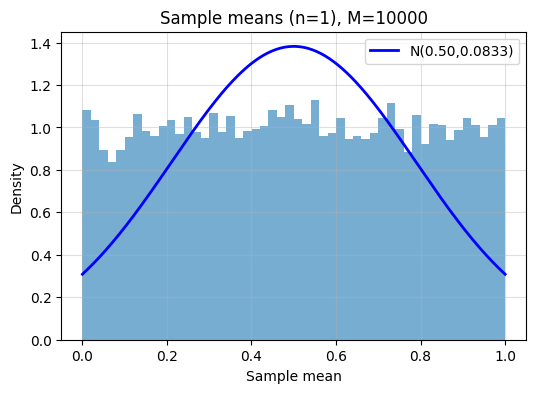

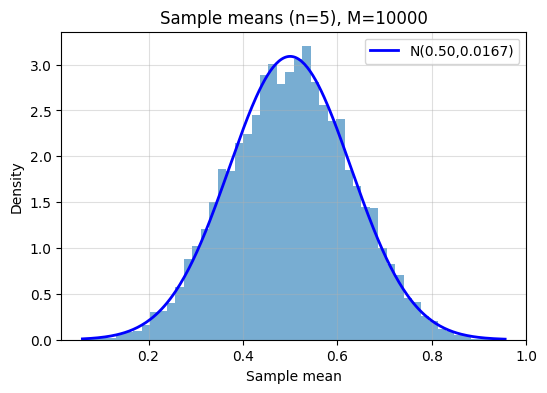

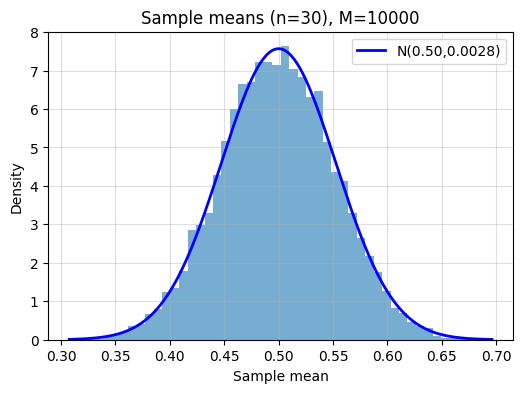

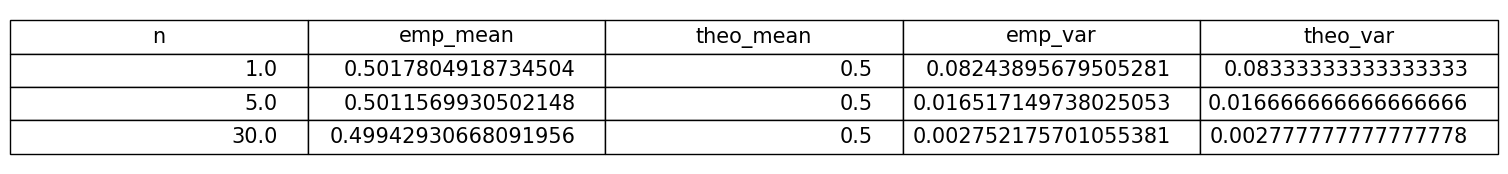

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seeds for reproducibility
np.random.seed(2025)

# Initialize parameters
M = 10000
n_values = [1, 5, 30]
rows = []

for n in n_values:
    #(a) sample means generation
    Ui = np.random.uniform(0, 1, size=(M, n)) # M samples of n uniform variables
    means = Ui.mean(axis=1)
    

    # (b) plot histogram + normal overlay
    
    # theoretical mean and variance
    theo_mean = 0.5
    theo_var = 1.0 / (12.0 * n)
    
    plt.figure(figsize=(6,4))
    plt.hist(means, bins=50, density=True, alpha=0.6) # Histogram of sample means
    x = np.linspace(np.min(means), np.max(means), 300) # x values for normal PDF
    plt.plot(x, norm.pdf(x, loc=theo_mean, scale=np.sqrt(theo_var)), 'b-', lw=2,
                label=f'N({theo_mean:.2f},{theo_var:.4f})') # Overlay normal PDF
    plt.title(f'Sample means (n={n}), M={M}')
    plt.xlabel('Sample mean')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

    # (c) - 1 empirical mean and variance vs theoretical
    emp_mean = means.mean()
    emp_var = means.var(ddof=0)
    rows.append([n, emp_mean, theo_mean, emp_var, theo_var])
    

# (c) - 2 Create DataFrame and plot table
df = pd.DataFrame(rows, columns=['n', 'emp_mean', 'theo_mean', 'emp_var', 'theo_var'])
# Plot table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # remove axis
# Convert DataFrame to matplotlib table
table = ax.table(
    cellText=df.values,       # table values
    colLabels=df.columns,     # column headers
    loc='center'
)
# Style
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(3.2, 2)

plt.show()


## Task 4: Applied Aggregation — 30-Day Rainfall

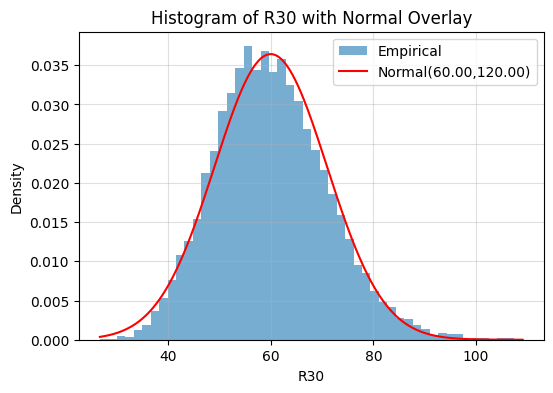

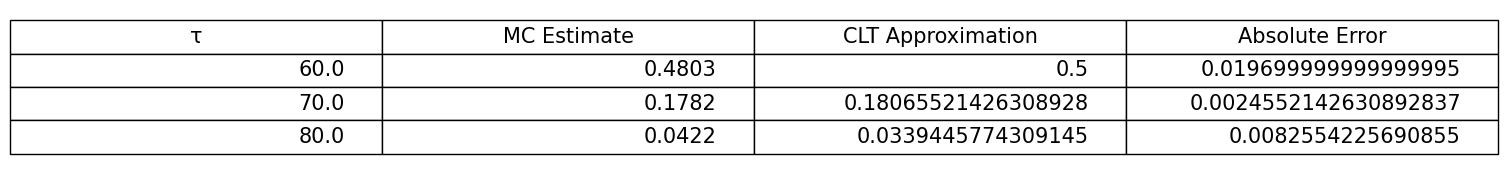

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seeds for reproducibility
np.random.seed(2025)

# Initialize parameters
M = 10000
lam = 0.5
n_days = 30
rows = []


#(a) Exponential samples generation
Ri = np.random.exponential(1/lam, size=(M, n_days)) # M samples of n exponentials
R30 = Ri.sum(axis=1) # Sum along rows to get R30

#(b)For thresholds τ ∈ {60, 70, 80}, estimate P(R30 ≥ τ ) by simulation.
n_values = [60, 70, 80]
estimates = {}
for tau in n_values:
    prob = np.mean(R30 >= tau) # Estimate probability : fraction of samples >= tau
    estimates[tau] = prob

# (c) Using the CLT with µ = 30/λ and σ2 = 30/λ2 , approximate P(R30 ≥ τ ): standardize and
# evaluate Normal tails explicitly.
mu = n_days / lam
sigma = np.sqrt(n_days) / lam
approximations = {}
for tau in n_values:
    z = (tau - mu) / sigma # Standardize
    prob_approx = 1 - norm.cdf(z) # P(Z >= z) = 1 - CDF(z)
    approximations[tau] = prob_approx
    
    
#(d) Histogram of R30 with N (µ, σ2 ) density overlaid.
plt.figure(figsize=(6,4))
plt.hist(R30, bins=50, density=True, alpha=0.6, label='Empirical') # Histogram of R30
x = np.linspace(np.min(R30), np.max(R30), 300) # x values for normal PDF
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma), 'r-', label=f'Normal({mu:.2f},{sigma**2:.2f})') # Overlay normal PDF
plt.title('Histogram of R30 with Normal Overlay')
plt.xlabel('R30')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

#(e) For each τ , report Monte Carlo estimate, CLT approximation, and absolute error.
rows = []
for tau in n_values:
    mc_estimate = estimates[tau]
    clt_approx = approximations[tau]
    abs_error = abs(mc_estimate - clt_approx)
    rows.append([tau, mc_estimate, clt_approx, abs_error])
    
df = pd.DataFrame(rows, columns=['τ', 'MC Estimate', 'CLT Approximation', 'Absolute Error'])
# Plot table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # remove axis
# Convert DataFrame to matplotlib table
table = ax.table(
    cellText=df.values,       # table values
    colLabels=df.columns,     # column headers
    loc='center'
)
# Style
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(3.2, 2)

plt.show()


## Task 5: Comparing Markov, Chebyshev, and Chernoff Bounds for a Gaussian

Samples generated for n values: [ 1000 36000 71000]


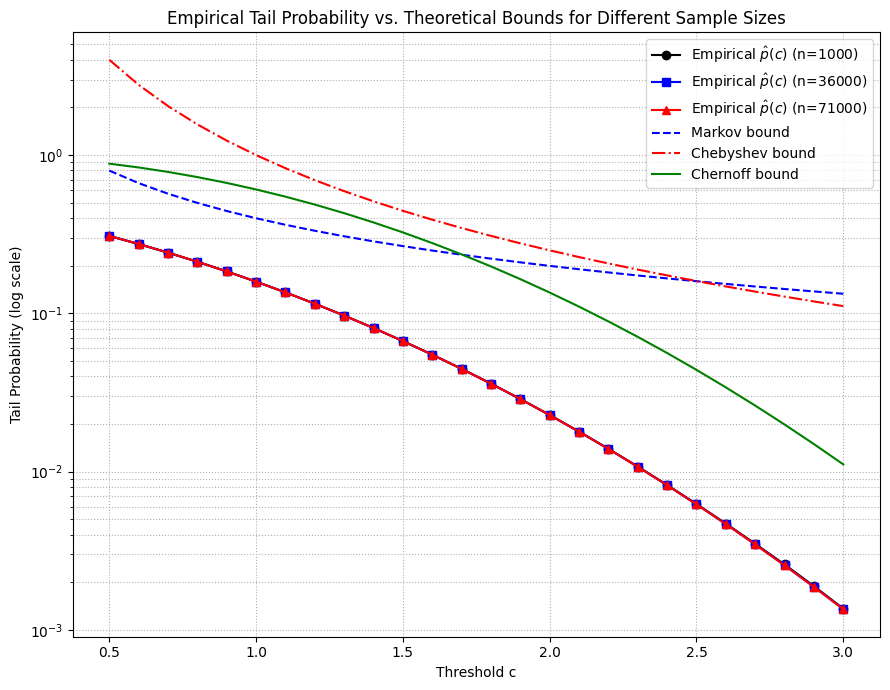

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import exp

# Set seeds for reproducibility
np.random.seed(2025)

# Initialize parameters
M = 10000
samples = {}

#(a) Generate samples X1 , . . . , Xn from Normal(0, 1) for n ranging from 1,000 to 100,000 
n_values = np.arange(1000, 100001, 35000) # n from 1,000 to 100,000 in steps of 35000

for n in n_values:
    # Normal(0, 1) samples generation
    Xi = np.random.normal(0, 1, size=(M, n)) # M samples of n normal variables
    samples[n] = Xi
    
print("Samples generated for n values:", n_values)

# (b) For thresholds c ∈ [0.5, 3.0] (e.g., step 0.1), estimate p̂(c) = = 1/n Sum^n_i=1 1{Xi ≥ c}.
#(c) Compute three bounds for each c: Markov, Chebyshev, Chernoff
#(d) Figure 5: Plot p̂(c) and the three bounds vs. c on the same axes (log-scale on y recommended).


thresholds=np.arange(0.5, 3.01, 0.1) # thresholds from 0.5 to 3.0 in steps of 0.1
plt.figure(figsize=(9, 7))

# Colors/markers for different n
colors = ['k', 'b', 'r', 'g', 'm', 'c']
markers = ['o', 's', '^', 'd', '*', 'x']

for i, n in enumerate(n_values):
    rows = []
    for c in thresholds:
        Xi = samples[n]
        pc_hat = np.mean(Xi >= c)
        E_Xplus = np.mean(np.maximum(Xi, 0.0))
        markov = E_Xplus / c if c > 0 else np.nan
        chebyshev = 1.0 / (c**2)
        chernoff = exp(-c*c/2.0)
        rows.append([c, pc_hat, markov, chebyshev, chernoff])

    df = pd.DataFrame(rows, columns=['c', 'Emp P(X>=c)', 'Markov', 'Chebyshev', 'Chernoff'])

    # Plot empirical for each n (different style)
    plt.semilogy(df['c'], df['Emp P(X>=c)'], 
                 color=colors[i % len(colors)], 
                 marker=markers[i % len(markers)], 
                 linestyle='-', 
                 label=f'Empirical $\\hat{{p}}(c)$ (n={n})')

# Add theoretical bounds (same for all n)
plt.semilogy(df['c'], df['Markov'], 'b--', label='Markov bound')
plt.semilogy(df['c'], df['Chebyshev'], 'r-.', label='Chebyshev bound')
plt.semilogy(df['c'], df['Chernoff'], 'g-', label='Chernoff bound')

plt.xlabel('Threshold c')
plt.ylabel('Tail Probability (log scale)')
plt.title('Empirical Tail Probability vs. Theoretical Bounds for Different Sample Sizes')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()
    
